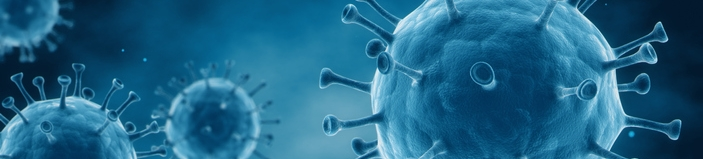

# Pima Indians Diabetes Database

## Overview
This Notebook will be completed in two main ways.
First, find and visualize useful data or meaningful relationships within the data.
Second, select a model based on the visualization of the previous process. Transform or refine the data into the appropriate form for the model to be used.
<br/><br/>

It is a DataSet that can predict diabetes among Pima Indians. We can understand relationships through data through various insights.So I think it's important to visualize and understand this. Since the size of the data is not large, beginners will be able to easily follow it.


##### "We need to address the imbalance in "Outcome" data in a variety of ways."
<br/><br/>

#### My opinion :
* 1) In this Notebook, the imbalance in "Outcome" data was solved by a technique called SMOTE.
* 2) If the above problem is solved, it should be modeled to produce good results using various models.

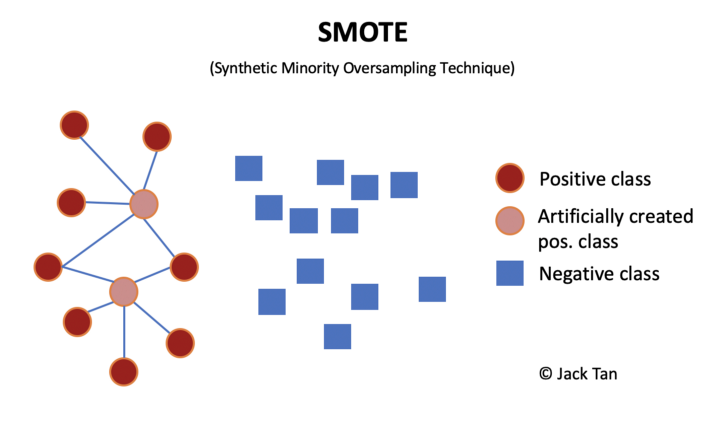

### There are two ways of dealing with data imbalances.
* 1) Increase the number of small amounts of data. (Oversampling)
* 2) It can reduce the number of data in large quantities. (Undersampling)

SMOTE is Oversampling technique belonging to one of these. It's creates and amplifies new data through relationships between data.

More information can be found in this document => https://arxiv.org/pdf/1106.1813.pdf

***
## My Workflow

#### 1. Import & Install libray
* Import Basic libray
* Import Enginnering libray

#### 2. Check out my data
* Check Shape / Info / Describe

#### 3. Exploratory Data Analysis(EDA) with Visualization [Before Preprocessing]
* Plot the null values
* Plot the Outecome Percent
* Distribution of various data over Outcome column (DistPlot)
* Distribution of various data over Outcome column (BoxPlot)
* Plot the Outcome per BloodPressure / Age with [3d interactive Plot]
* Plot the Outcome per BloodPressure / Age with [3d interactive Plot]
* Diabetes data Heatmap Plot

#### 4. Preprocessing Data
* Drop more than 400 columns Insulin

#### 5. Feature Enginnering
* Get useful columns
* OverSampling [SMOTE]

#### 6. Modeling
* Evaluation function definition

###### Before SMOTE 
* LogisticRegression Modeling
* RandomForest Modeling
* LightGBM Modeling

###### After SMOTE
* LogisticRegression Modeling
* RandomForest Modeling
* LightGBM Modeling

#### 7. Submission
* Submit the predictions
<br/><br/>
***

# 1. Import & Install libray
* Import Basic libray
* Import Enginnering libray

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import seaborn as sns
import missingno as msno
import plotly.express as px
import  matplotlib.pyplot as plt


plt.style.use('seaborn')
%matplotlib inline

In [2]:
train_df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2. Check out my data
* Check Shape / Info / Describe

In [3]:
train_df.shape

(768, 9)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
train_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


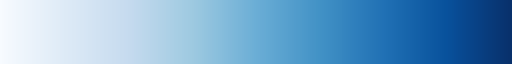

In [6]:
sns.color_palette("Blues", as_cmap=True)

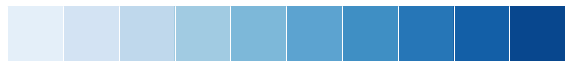

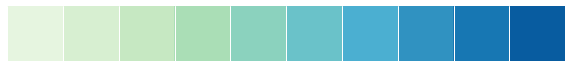

In [7]:
GnBu_palette = sns.color_palette("GnBu",10)
Blues_palette = sns.color_palette("Blues",10)
sns.palplot(Blues_palette)
sns.palplot(GnBu_palette)

#### ✔️ This notebook will use this palettes.

# 3. Exploratory Data Analysis(EDA) with Visualization [Before Preprocessing]
* Plot the null values
* Plot the Outecome Percent
* Distribution of various data over Outcome column (DistPlot)
* Distribution of various data over Outcome column (BoxPlot)
* Plot the Outcome per BloodPressure / Age with [3d interactive Plot]
* Plot the Outcome per BloodPressure / Age with [3d interactive Plot]
* Diabetes data Heatmap Plot

### 3-1) Plot the null values

In [8]:
pd.DataFrame(train_df.isnull().sum(), columns=["Null Count"]).style.background_gradient(cmap='Blues')

,Null Count
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<AxesSubplot:>

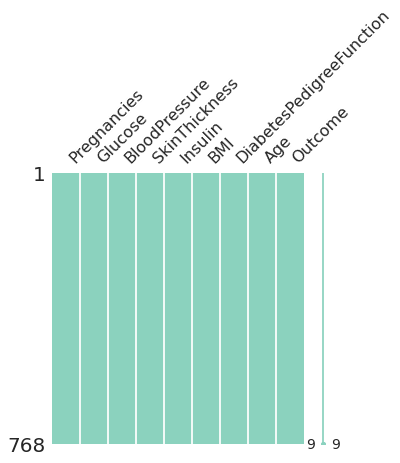

In [9]:
msno.matrix(df=train_df.iloc[:,:],figsize=(5,5),color=GnBu_palette[4])

### 3-2) Plot the Outecome Percent

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


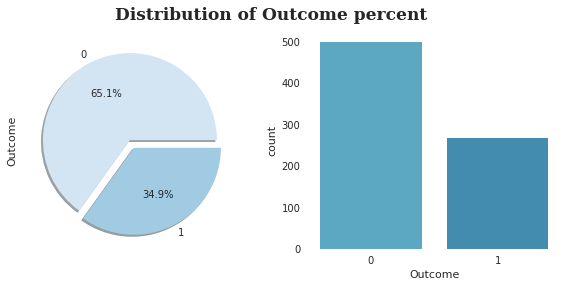

In [10]:
fig, axes = plt.subplots(1,2,figsize=(10,4))

train_df['Outcome'].value_counts().plot.pie(
    explode=[0,0.1],autopct='%1.1f%%',ax=axes[0],shadow=True, colors=[Blues_palette[1],Blues_palette[3]]
)

sns.countplot('Outcome',data=train_df,ax=axes[1], palette=[GnBu_palette[6],GnBu_palette[7]])
axes[1].patch.set_alpha(0)

fig.text(0.28,0.92,"Distribution of Outcome percent", fontweight="bold", fontfamily='serif', fontsize=17)

plt.show()

In [11]:
pd.crosstab(train_df['Pregnancies'],train_df['Outcome'],margins=True).style.background_gradient(cmap='Blues')

Outcome,0,1,All
Pregnancies,,,
0,73,38,111
1,106,29,135
2,84,19,103
3,48,27,75
4,45,23,68
5,36,21,57
6,34,16,50
7,20,25,45
8,16,22,38


### 3-3) Distribution of various data over Outcome column (DistPlot)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

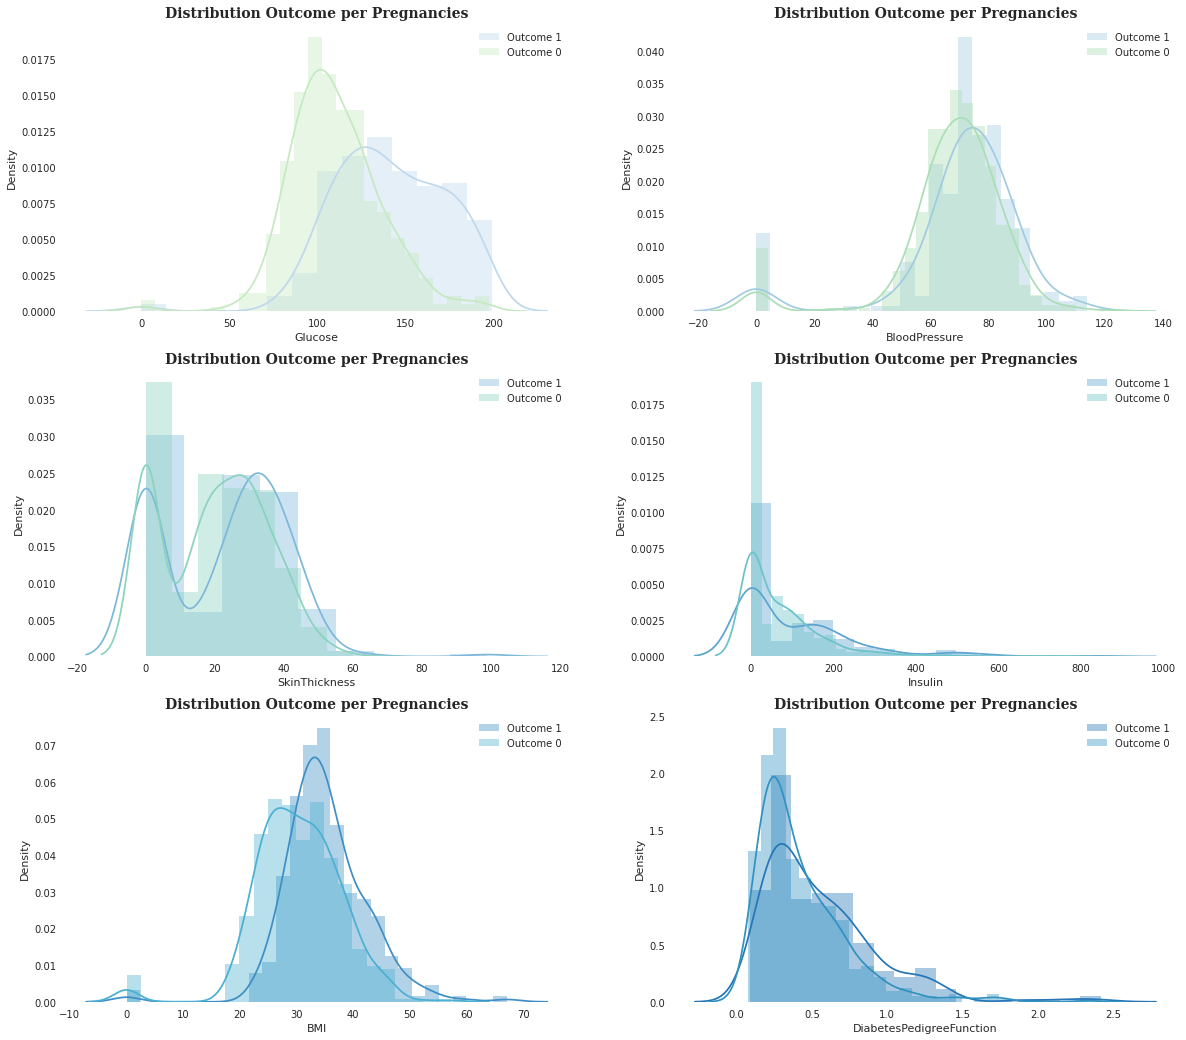

In [12]:
train_col = train_df.drop(['Outcome','Pregnancies'],axis=1).columns
i = [0, 1, 0, 1, 0, 1]
j = [0, 0, 1, 1, 2, 2]

fig, axes = plt.subplots(3,2, figsize=(20,18))

for index, col, i, j in zip(range(6),train_col, i, j):

    sns.distplot(train_df[train_df['Outcome']==1][col], ax=axes[j,i], label='Outcome 1', color=Blues_palette[index+2])
    sns.distplot(train_df[train_df['Outcome']==0][col], ax=axes[j,i], label='Outcome 0', color=GnBu_palette[index+2])
    axes[j,i].patch.set_alpha(0)
    axes[j,i].set_title("Distribution Outcome per Pregnancies", fontweight="bold", fontfamily='serif', fontsize=14)
    axes[j,i].legend()
plt.show()

### 3-4) Distribution of various data over Outcome column (BoxPlot)

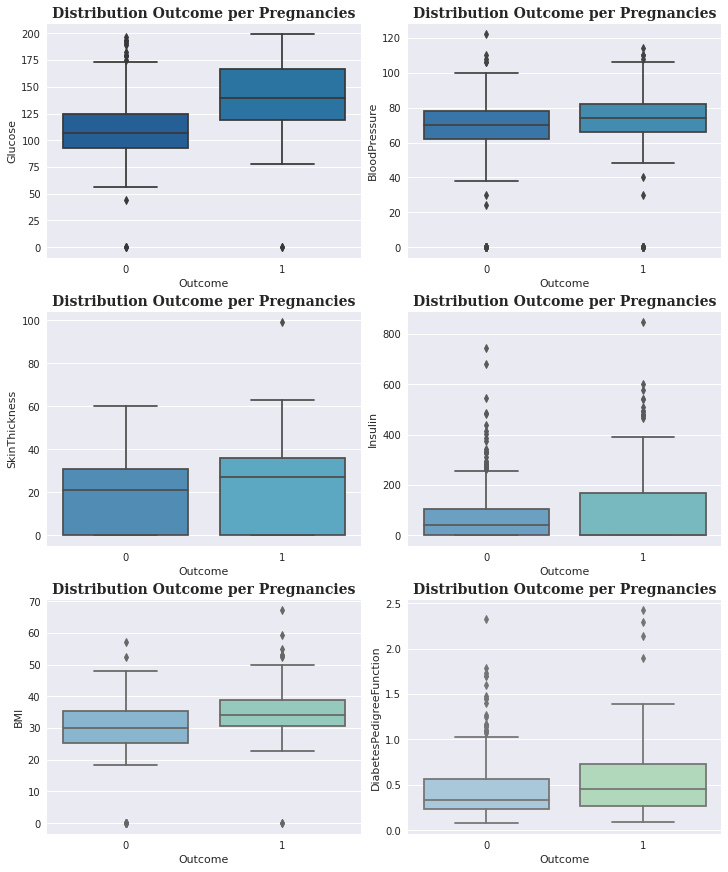

In [13]:
train_col = train_df.drop(['Outcome','Pregnancies'],axis=1).columns
i = [0, 1, 0, 1, 0, 1]
j = [0, 0, 1, 1, 2, 2]

fig, axes = plt.subplots(3,2, figsize=(10,12), constrained_layout = True )

for index, col, i, j in zip(range(6),train_col, i, j):

    sns.boxplot(x="Outcome", y=col,  data=train_df, ax=axes[j,i], palette=[Blues_palette[8-index],GnBu_palette[8-index]])

    axes[j,i].set_title("Distribution Outcome per Pregnancies", fontweight="bold", fontfamily='serif', fontsize=14)
    axes[j,i].legend()
plt.show()


## 3-5) Plot the Outcome per BloodPressure / Age with [3d interactive Plot]

In [14]:
fig = px.scatter_3d(train_df.iloc[:500], x='BloodPressure', y='Outcome', z='Age',
                    color='Age')
fig.show()

### 3-6) Diabetes data Heatmap Plot

In [15]:
train_df[train_df.columns[:8]].corr().style.background_gradient(cmap='Blues')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


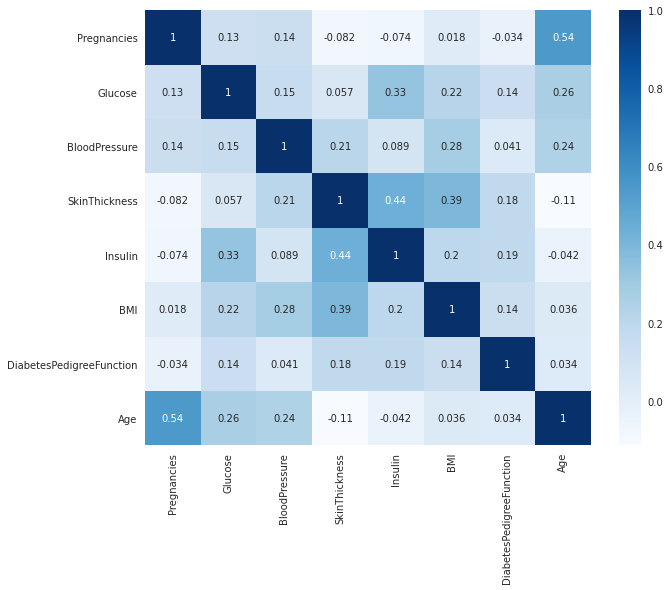

In [16]:
sns.heatmap(train_df[train_df.columns[:8]].corr(),annot=True,cmap='Blues')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# 4. Preprocessing Data
* Drop more than 400 columns Insulin

In [17]:
df = train_df[train_df['Insulin']<=400]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
print('After Drop Insulin DataFrame Shape : ',df.shape)

After Drop Insulin DataFrame Shape :  (748, 9)


# 5. Feature Enginnering
* Get useful columns
* OverSampling [SMOTE]

In [19]:
features = ['Glucose','BloodPressure','Insulin','BMI','Age']

In [20]:
x = df[features]
y = df['Outcome']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [22]:
x_train.head()

,Glucose,BloodPressure,Insulin,BMI,Age
757,123,72,0,36.3,52
5,116,74,0,25.6,30
445,180,78,14,59.4,25
598,173,74,0,36.8,38
265,96,74,67,33.6,43


In [23]:
y_train.head()

757    1
5      0
445    1
598    1
265    0
Name: Outcome, dtype: int64

In [24]:
smote = SMOTE()
x_over, y_over = smote.fit_resample(x_train,y_train)

In [25]:
x_over.shape

(766, 5)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning:


The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



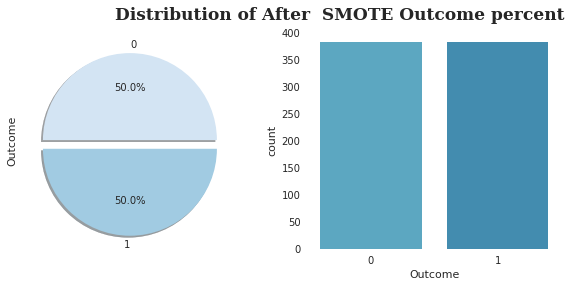

In [26]:
fig, axes = plt.subplots(1,2,figsize=(10,4))

y_over.value_counts().plot.pie(
    explode=[0,0.1],autopct='%1.1f%%',ax=axes[0],shadow=True, colors=[Blues_palette[1],Blues_palette[3]]
)

sns.countplot(y_over, ax=axes[1], palette=[GnBu_palette[6],GnBu_palette[7]])
axes[1].patch.set_alpha(0)

fig.text(0.28,0.92,"Distribution of After  SMOTE Outcome percent", fontweight="bold", fontfamily='serif', fontsize=17)

plt.show()

# 6. Modeling
* Evaluation function definition

#### Before SMOTE 
* LogisticRegression Modeling
* RandomForest Modeling
* LightGBM Modeling

#### After SMOTE
* LogisticRegression Modeling
* RandomForest Modeling
* LightGBM Modeling

## Before SMOTE ------------------------

### 6-1) Evaluation function definition

In [27]:
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuacy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('confusion')
    print(confusion)
    print('accuacy : {}'.format(np.around(accuacy,4)))
    print('precision: {}'.format(np.around(precision,4)))
    print('recall : {}'.format(np.around(recall,4)))
    print('F1 : {}'.format(np.around(f1,4)))  
    print('ROC_AUC : {}'.format(np.around(roc_auc,4)))

### 6-2) LogisticRegression Modeling

In [28]:
lg_reg = LogisticRegression()

lg_reg.fit(x_train, y_train)
pred = lg_reg.predict(x_test)
pred_proba = lg_reg.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[103   6]
 [ 23  18]]
accuacy : 0.8067
precision: 0.75
recall : 0.439
F1 : 0.5538
ROC_AUC : 0.8367


### 6-2) RandomForest Modeling

In [29]:
rf_clf = RandomForestClassifier()
param = {'n_estimators' : [100],
         'max_depth':[8,9,10],
         'min_samples_split':[2,5,7],
         'min_samples_leaf':[6.5,7,7.5]
        }

In [30]:
grid = GridSearchCV(rf_clf,param_grid = param,scoring = 'accuracy',cv=5)
grid.fit(x_train ,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:614: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 393, in fit
    for i, t in enumerate(trees))
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.7/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/python3.7/site-packages/jobl

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10],
                         'min_samples_leaf': [6.5, 7, 7.5],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [100]},
             scoring='accuracy')

In [31]:
grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'n_estimators': 100}

In [32]:
grid.best_score_

0.7542016806722689

In [33]:
pred = grid.predict(x_test)
pred_proba = grid.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[94 15]
 [17 24]]
accuacy : 0.7867
precision: 0.6154
recall : 0.5854
F1 : 0.6
ROC_AUC : 0.8082


### 6-2) LightGBM Classification Modeling

In [34]:
model = lgb.LGBMClassifier(
    n_estimators=400,
    num_leaves=20,
    min_data_in_leaf=60,
    learning_rate=0.01,
    boosting='gbdt',
    objective='binary',
    metric='auc',
    Is_training_metric=True,
    n_jobs=-1
)

In [35]:
model.fit(x_train,y_train)

[LightGBM] [Warning] Unknown parameter: Is_training_metric
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


LGBMClassifier(Is_training_metric=True, boosting='gbdt', learning_rate=0.01,
               metric='auc', min_data_in_leaf=60, n_estimators=400,
               num_leaves=20, objective='binary')

In [36]:
pred = model.predict(x_test)
pred_proba = model.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[97 12]
 [21 20]]
accuacy : 0.78
precision: 0.625
recall : 0.4878
F1 : 0.5479
ROC_AUC : 0.8165


## After SMOTE ------------------------

### 6-3) LogisticRegression Modeling

In [37]:
lg_reg = LogisticRegression()

lg_reg.fit(x_over, y_over)
pred = lg_reg.predict(x_test)
pred_proba = lg_reg.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[93 16]
 [14 27]]
accuacy : 0.8
precision: 0.6279
recall : 0.6585
F1 : 0.6429
ROC_AUC : 0.8371


### 6-3) RandomForest Modeling

In [38]:
rf_clf = RandomForestClassifier()
param = {'n_estimators' : [200],
         'max_depth':[10],
         'min_samples_split':[2],
         'min_samples_leaf':[7]
        }

In [39]:
grid = GridSearchCV(rf_clf,param_grid = param,scoring = 'accuracy',cv=5)
grid.fit(x_over ,y_over)

pred = grid.predict(x_test)
pred_proba = grid.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[85 24]
 [14 27]]
accuacy : 0.7467
precision: 0.5294
recall : 0.6585
F1 : 0.587
ROC_AUC : 0.7993


### 6-3) LightGBM Classification Modeling

In [40]:
model = lgb.LGBMClassifier(
    n_estimators=400,
    num_leaves=20,
    min_data_in_leaf=60,
    learning_rate=0.01,
    boosting='gbdt',
    objective='binary',
    metric='auc',
    Is_training_metric=True,
    n_jobs=-1
)

In [41]:
model.fit(x_over,y_over)

[LightGBM] [Warning] Unknown parameter: Is_training_metric
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60


LGBMClassifier(Is_training_metric=True, boosting='gbdt', learning_rate=0.01,
               metric='auc', min_data_in_leaf=60, n_estimators=400,
               num_leaves=20, objective='binary')

In [42]:
pred = model.predict(x_test)
pred_proba = model.predict_proba(x_test)[:,1]
get_clf_eval(y_test, pred, pred_proba)

confusion
[[91 18]
 [17 24]]
accuacy : 0.7667
precision: 0.5714
recall : 0.5854
F1 : 0.5783
ROC_AUC : 0.796


# 7. Submission
* Submit the predictions

In [43]:
submission = pd.DataFrame(x_test)

In [44]:
pred = model.predict(x_test)

In [45]:
submission['Outcome'] = y_test
submission['Predict_Outcome'] = pred

In [46]:
submission.head()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome,Predict_Outcome
521,124,80,130,33.2,26,0,0
270,101,86,0,45.6,38,1,0
145,102,75,0,0.0,21,0,0
566,99,72,18,38.6,21,0,0
601,96,0,0,23.7,28,0,0


###  If this notebook is useful for your kaggling, "UPVOTE" for it 👀
#### THX to Reading My Notebook🌈